### EVOLUTION OF ELECTRIC VEHICLE IN MARKET USING MACHINE LEARNING

In [1]:
import pandas as pd
data = pd.read_csv("D:\CDAC\PG-DBDA\EV Project\EV_Population_Data.csv")

In [2]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
data_cleaned = data[data['Model Year'] != 2024]

In [4]:
cleaned_file_path = "EV_Population_Data_Cleaned.csv"
data_cleaned.to_csv(cleaned_file_path, index=False)

In [5]:
import pandas as pd
ev = pd.read_csv("EV_Population_Data_Cleaned.csv")

### Check the columns in the dataset

In [6]:
ev.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170786 entries, 0 to 170785
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         170786 non-null  object 
 1   County                                             170781 non-null  object 
 2   City                                               170781 non-null  object 
 3   State                                              170786 non-null  object 
 4   Postal Code                                        170781 non-null  float64
 5   Model Year                                         170786 non-null  int64  
 6   Make                                               170786 non-null  object 
 7   Model                                              170786 non-null  object 
 8   Electric Vehicle Type                              170786 non-null  object

In [8]:
ev.shape

(170786, 17)

In [9]:
ev.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [10]:
ev.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,170781.000000,170786.000000,170786.000000,170786.000000,170405.000000,1.707860e+05,1.707810e+05
mean,98171.769687,2020.371061,60.585382,1117.595529,29.213286,2.186357e+08,5.297511e+10
std,2452.978690,2.963558,93.400414,8527.206917,14.864770,7.698661e+07,1.601637e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.797312e+08,5.303301e+10
50%,98122.000000,2021.000000,0.000000,0.000000,33.000000,2.259577e+08,5.303303e+10
75%,98370.000000,2023.000000,84.000000,0.000000,43.000000,2.529012e+08,5.305307e+10
max,99577.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


### Check if there are any null values or not

In [11]:
ev.isnull().values.any()

np.True_

### Count null values column-wise

In [12]:
ev.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 381
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

### Find rows with null values

In [13]:
ev[ev.isnull().any(axis=1)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
54736,1G1FZ6S00K,Washoe,Reno,NV,89521.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,NaN,231094930,POINT (-119.74505 39.436555),NON WASHINGTON STATE ELECTRIC UTILITY,3.203100e+10
72209,5YJSA1E54P,District of Columbia,Washington,DC,20003.0,2023,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,238713044,POINT (-76.985835 38.88411),NON WASHINGTON STATE ELECTRIC UTILITY,1.100101e+10
74859,3FA6P0PU8F,Kern,Ridgecrest,CA,93555.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,475775205,POINT (-117.67228 35.62073),NON WASHINGTON STATE ELECTRIC UTILITY,6.029005e+09
76291,5UXKT0C36H,Cumberland,Fayetteville,NC,28305.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,NaN,110287313,POINT (-78.90195 35.058245),NON WASHINGTON STATE ELECTRIC UTILITY,3.705100e+10
76355,2C4RC1H78J,Oldham,Goshen,KY,40026.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,NaN,277234681,POINT (-85.5824778 38.4053653),NON WASHINGTON STATE ELECTRIC UTILITY,2.118503e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170423,5YJ3E1EB4J,Jefferson,Watertown,NY,13603.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,151504335,POINT (-75.8131886 44.045225),NON WASHINGTON STATE ELECTRIC UTILITY,3.604506e+10
170462,7SAXCBE62N,Loudoun,Aldie,VA,20105.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,198763512,POINT (-77.55783 38.9221),NON WASHINGTON STATE ELECTRIC UTILITY,5.110761e+10
170607,5YJ3E1EC2P,Frederick,Frederick,MD,21701.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,244377416,POINT (-77.409075 39.416495),NON WASHINGTON STATE ELECTRIC UTILITY,2.402175e+10
170708,JTMEB3FV8P,Frederick,Middletown,MD,21769.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,251425919,POINT (-77.54559 39.44235),NON WASHINGTON STATE ELECTRIC UTILITY,2.402175e+10


### Display only columns with missing values

In [14]:
ev[ev.columns[ev.isnull().any()]]

,County,City,Postal Code,Legislative District,Vehicle Location,Electric Utility,2020 Census Tract
0,King,Seattle,98122.0,37.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,Snohomish,Bothell,98021.0,1.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,King,Seattle,98109.0,36.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,King,Issaquah,98027.0,5.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,Kitsap,Suquamish,98392.0,23.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...
170781,Pierce,Bonney Lake,98391.0,31.0,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
170782,Mason,Shelton,98584.0,35.0,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
170783,Grant,Quincy,98848.0,13.0,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
170784,King,Black Diamond,98010.0,5.0,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [15]:
ev = ev.dropna()

In [16]:
ev.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,170401.000000,170401.000000,170401.000000,170401.000000,170401.000000,1.704010e+05,1.704010e+05
mean,98260.307569,2020.372568,60.571094,1115.042400,29.213526,2.186563e+08,5.303982e+10
std,303.382609,2.963391,93.394252,8515.459694,14.864862,7.699161e+07,1.622987e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.797535e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.259724e+08,5.303303e+10
75%,98371.000000,2023.000000,84.000000,0.000000,43.000000,2.529143e+08,5.305307e+10
max,99403.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


### Correlation matrix

In [17]:
ev[["Electric Range", "Base MSRP", "Model Year"]].corr()

,Electric Range,Base MSRP,Model Year
Electric Range,1.000000,0.106380,-0.470663
Base MSRP,0.106380,1.000000,-0.230642
Model Year,-0.470663,-0.230642,1.000000


1. Range <---> MSRP: Moderately positive correlation.
2. Model Year <---> Range/MSRP: Surprisingly negative, suggesting older EVs in dataset have higher range/MSRP — possibly due to filtering or data bias.

### EV Adoption Over Time by visualizing the number of EVs registered by model year

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

C:\Users\singh\AppData\Local\Temp\ipykernel_28660\1528979238.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


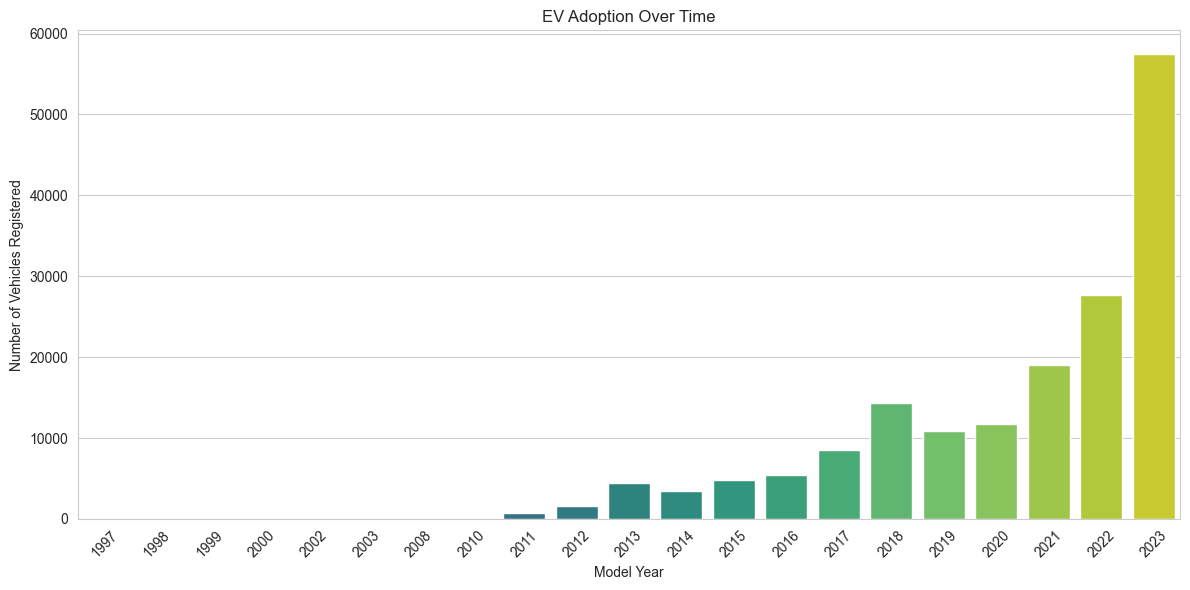

In [19]:
# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016.
2. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards.
3. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

###  Top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties

In [20]:
# geographical distribution at county level
ev_county_distribution = ev['County'].value_counts()
top_counties = ev_county_distribution.head(3).index
print(top_counties)

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')


In [21]:
# filtering the dataset for these top counties
top_counties_data = ev[ev['County'].isin(top_counties)]
print(top_counties_data)

        VIN (1-10)     County           City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King        Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish        Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King        Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King       Issaquah    WA      98027.0        2016   
7       KNAGV4LD9J  Snohomish        Bothell    WA      98012.0        2018   
...            ...        ...            ...   ...          ...         ...   
170778  5YJ3E1EB8N  Snohomish      Snohomish    WA      98296.0        2022   
170779  1N4BZ1DV7M       King        Redmond    WA      98053.0        2021   
170781  7SAYGDEE3N     Pierce    Bonney Lake    WA      98391.0        2022   
170784  WVGKMPE27M       King  Black Diamond    WA      98010.0        2021   
170785  5YJ3E1EA8M     Pierce         Tacoma    WA      98422.0        2021   

              Make    Model                   Elect

In [22]:
# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [23]:
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)
print(top_cities)

      County       City  Number of Vehicles
0       King    Seattle               28388
1       King   Bellevue                8606
2       King    Redmond                6271
3       King   Kirkland                5146
4       King  Sammamish                5059
5       King     Renton                4587
6  Snohomish    Bothell                4482
7     Pierce     Tacoma                3608
8       King       Kent                2693
9       King   Issaquah                2656


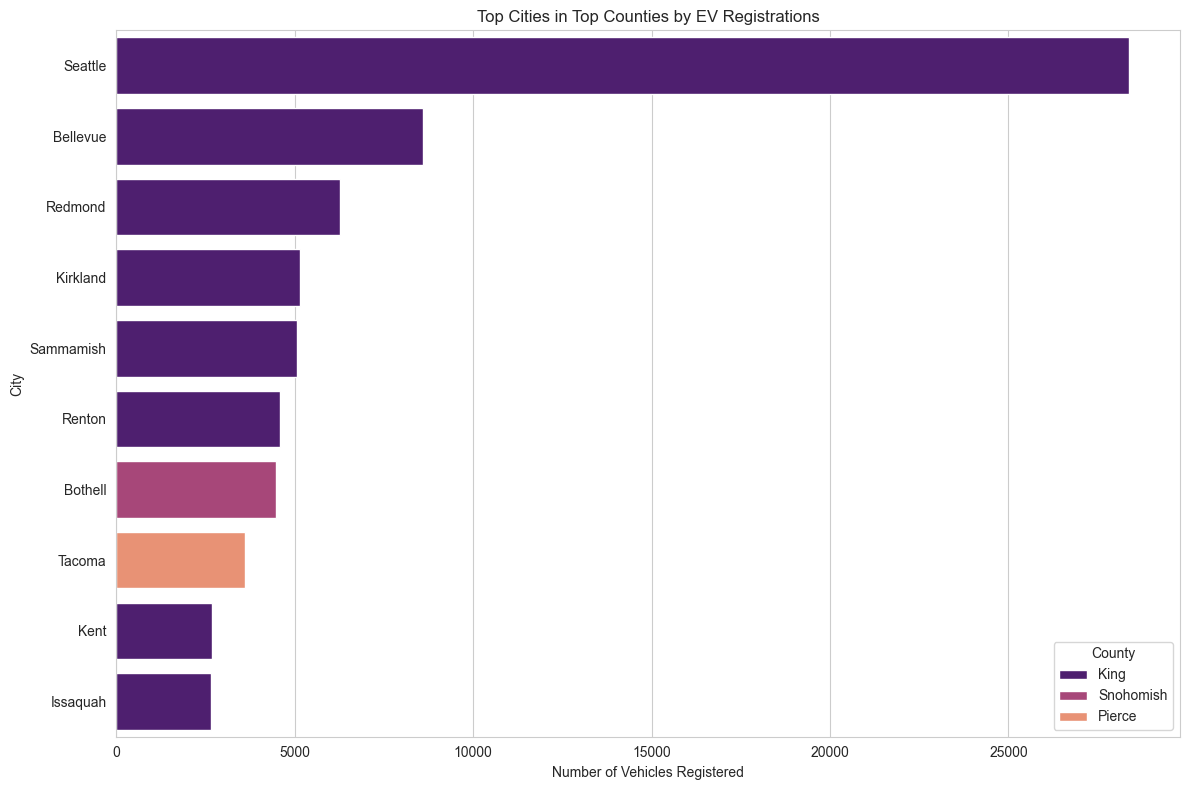

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. 
The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county.
1. Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
2. Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.
3. Cities in Snohomish County, such as Kirkland and Sammamish, show moderate EV registrations.
4. Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.
5. Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.

### Distribution of electric vehicle types

In [25]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev['Electric Vehicle Type'].value_counts()
print(ev_type_distribution)

Electric Vehicle Type
Battery Electric Vehicle (BEV)            135678
Plug-in Hybrid Electric Vehicle (PHEV)     34723
Name: count, dtype: int64


C:\Users\singh\AppData\Local\Temp\ipykernel_28660\2076701521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


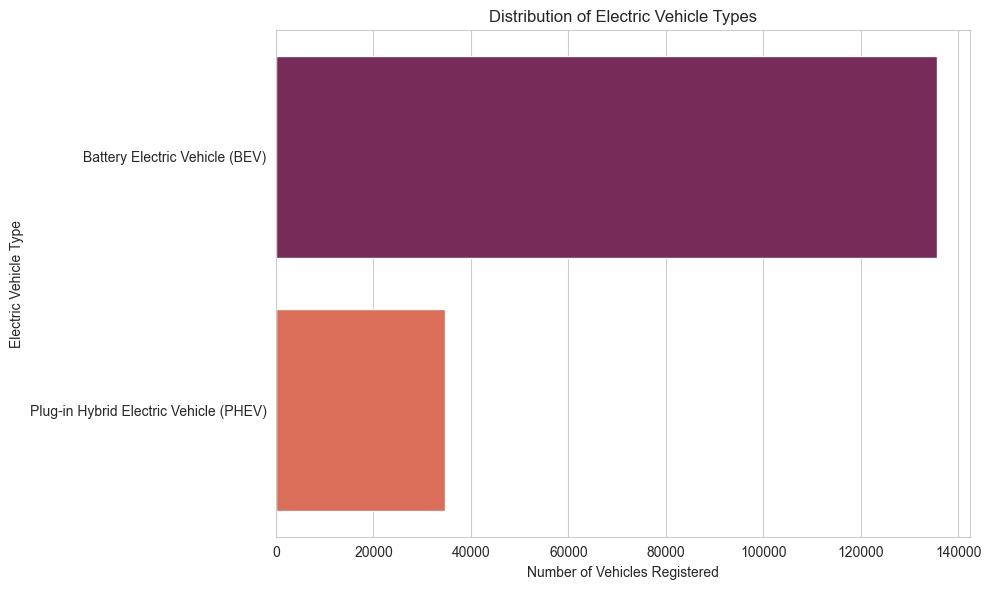

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

### Most popular manufacturers

In [27]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev['Make'].value_counts().head(10)  # Limiting to top 10 for clarity
print(ev_make_distribution)

Make
TESLA         78914
NISSAN        13911
CHEVROLET     13604
FORD           9174
KIA            6859
BMW            6381
TOYOTA         5817
VOLKSWAGEN     4993
RIVIAN         4108
HYUNDAI        4083
Name: count, dtype: int64


C:\Users\singh\AppData\Local\Temp\ipykernel_28660\2237413523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


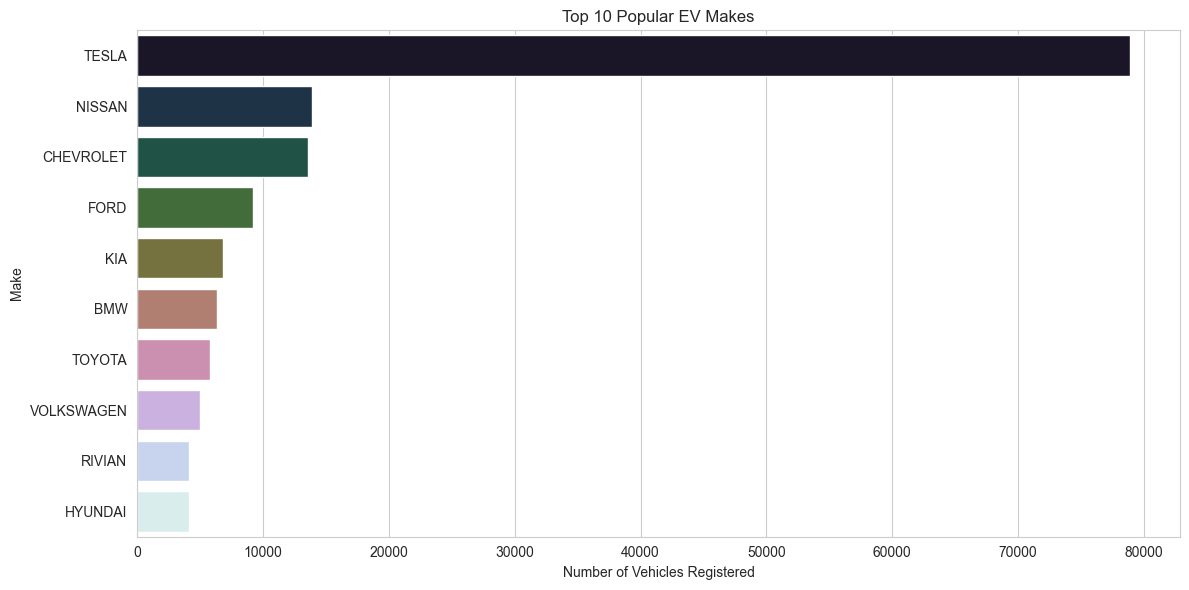

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

1. TESLA leads by a substantial margin with the highest number of vehicles registered.
2. NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
3. FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.

### Consumer preferences at the model level

In [29]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index
print(top_3_makes)

Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object', name='Make')


In [30]:
# filtering the dataset for these top manufacturers
top_makes_data = ev[ev['Make'].isin(top_3_makes)]
print(top_makes_data)

        VIN (1-10)     County         City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King      Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish      Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King      Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King     Issaquah    WA      98027.0        2016   
4       5YJYGDEE5M     Kitsap    Suquamish    WA      98392.0        2021   
...            ...        ...          ...   ...          ...         ...   
170779  1N4BZ1DV7M       King      Redmond    WA      98053.0        2021   
170780  1G1FX6S00J    Clallam       Sequim    WA      98382.0        2018   
170781  7SAYGDEE3N     Pierce  Bonney Lake    WA      98391.0        2022   
170783  5YJYGDEE6M      Grant       Quincy    WA      98848.0        2021   
170785  5YJ3E1EA8M     Pierce       Tacoma    WA      98422.0        2021   

             Make    Model           Electric Vehicle Type  \
0           T

In [31]:
# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
#print(ev_model_distribution_top_makes)

In [32]:
# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)
print(top_models)

        Make     Model  Number of Vehicles
0      TESLA   MODEL Y               35412
1      TESLA   MODEL 3               30004
2     NISSAN      LEAF               13279
3      TESLA   MODEL S                7711
4  CHEVROLET   BOLT EV                6811
5      TESLA   MODEL X                5741
6  CHEVROLET      VOLT                4782
7  CHEVROLET  BOLT EUV                1770
8     NISSAN     ARIYA                 632
9  CHEVROLET     SPARK                 240


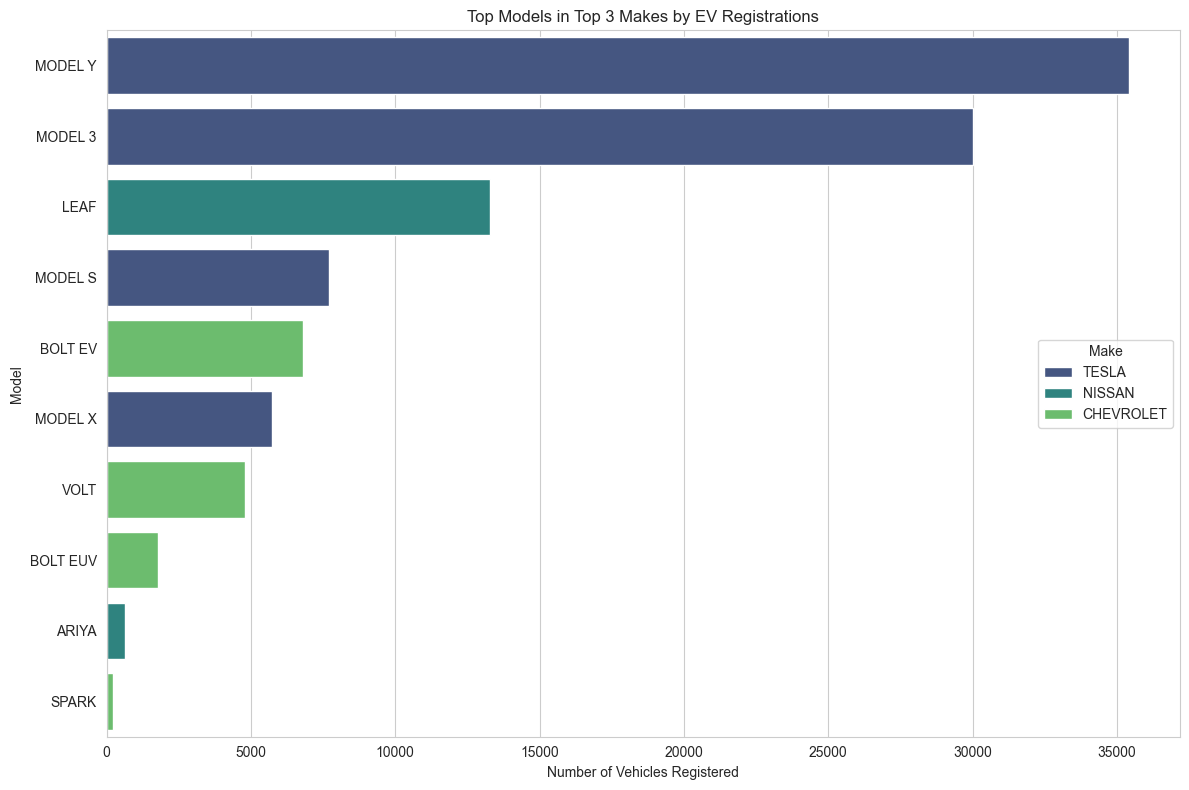

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: 
TESLA, NISSAN, and CHEVROLET.
1. TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
2. NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
3. TESLA’s MODEL S and MODEL X also have a significant number of registrations.
4. CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
5. NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

### Distribution of electric ranges

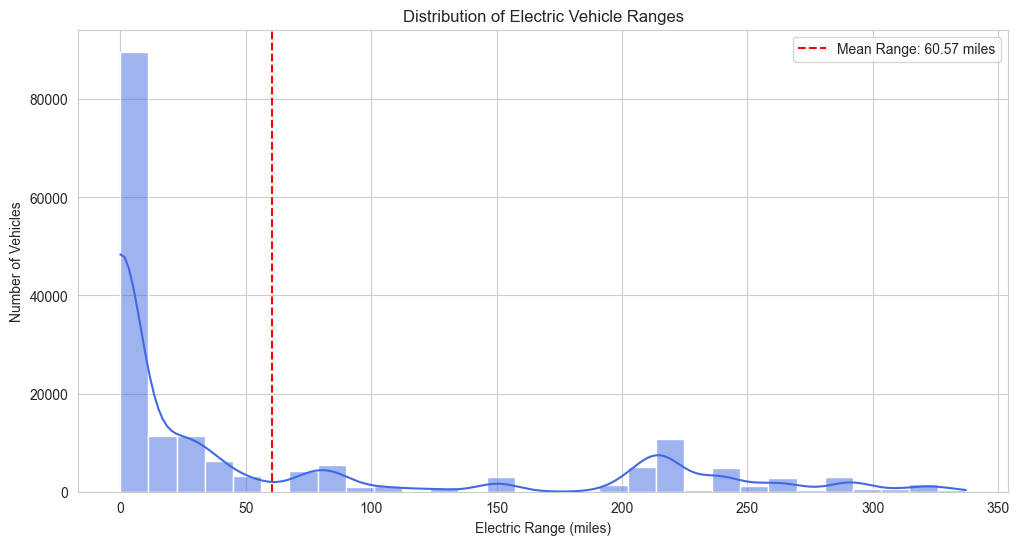

In [34]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The above graph shows the mean electric range. Key observations from the graph include:
1. There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
2. The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
3. The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
4. Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

### Average electric range by model year

In [35]:
# calculating the average electric range by model year
average_range_by_year = ev.groupby('Model Year')['Electric Range'].mean().reset_index()
print(average_range_by_year)

    Model Year  Electric Range
0         1997       39.000000
1         1998       58.000000
2         1999       74.000000
3         2000       58.000000
4         2002       95.000000
5         2003       95.000000
6         2008      220.000000
7         2010      226.086957
8         2011       70.891613
9         2012       61.172243
10        2013       79.822232
11        2014       80.798341
12        2015       98.254869
13        2016      101.197111
14        2017      114.162292
15        2018      156.165967
16        2019      176.918904
17        2020      238.748978
18        2021       11.402665
19        2022        4.518045
20        2023        3.729168


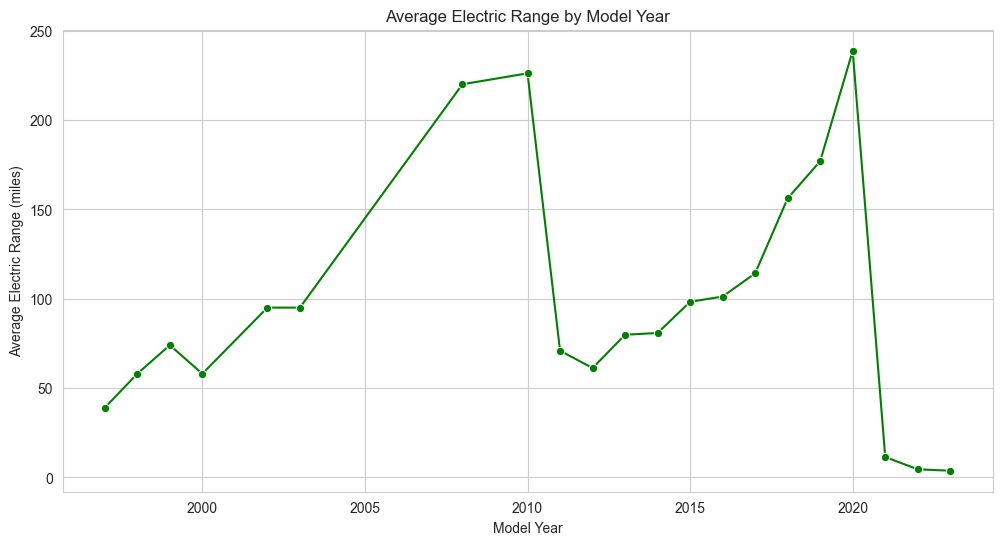

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:
1. There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
2. There is a noticeable peak around the year 2020 when the average range reaches its highest point.
3. Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
4. After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.
5. The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

### Electric ranges vary among the top manufacturers and models

In [37]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
print(average_range_by_model)

         Make        Model  Electric Range
0       TESLA     ROADSTER      234.673913
1       TESLA      MODEL S      176.794449
2   CHEVROLET      BOLT EV      154.857143
3       TESLA      MODEL X      138.220171
4       TESLA      MODEL 3      109.481269
5      NISSAN         LEAF       84.611341
6   CHEVROLET        SPARK       82.000000
7   CHEVROLET         VOLT       45.365119
8   CHEVROLET  S-10 PICKUP       39.000000
9       TESLA      MODEL Y       19.467384
10  CHEVROLET     BOLT EUV        0.000000
11     NISSAN        ARIYA        0.000000


In [38]:
# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)
print(top_range_models)

        Make        Model  Electric Range
0      TESLA     ROADSTER      234.673913
1      TESLA      MODEL S      176.794449
2  CHEVROLET      BOLT EV      154.857143
3      TESLA      MODEL X      138.220171
4      TESLA      MODEL 3      109.481269
5     NISSAN         LEAF       84.611341
6  CHEVROLET        SPARK       82.000000
7  CHEVROLET         VOLT       45.365119
8  CHEVROLET  S-10 PICKUP       39.000000
9      TESLA      MODEL Y       19.467384


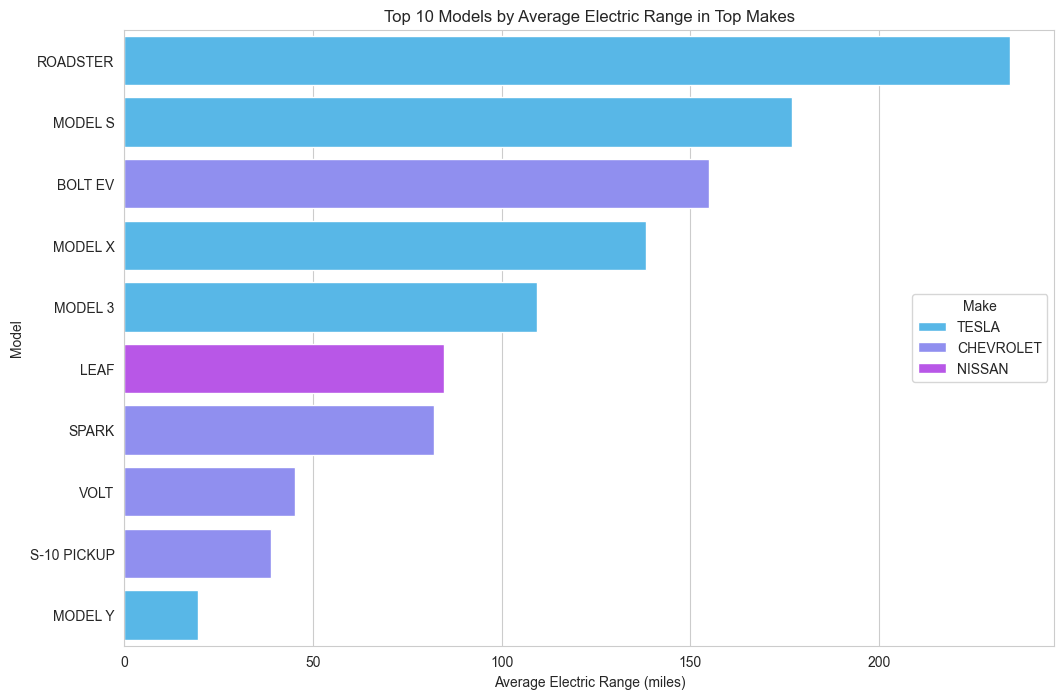

In [39]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

1. The TESLA ROADSTER has the highest average electric range among the models listed. 
2. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. 
3. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. 
4. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

### Estimated Market Size Analysis of Electric Vehicles in the United States

In [40]:
# calculate the number of EVs registered each year
ev_registration_counts = ev['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
Name: count, dtype: int64

### Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures

In [41]:
from scipy.optimize import curve_fit
import numpy as np

In [42]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]
print(filtered_years)

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
Name: count, dtype: int64


The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:
1. In 2021, there were 19,063 EVs registered.
2. In 2022, the number increased to 27708 EVs.
3. In 2023, a significant jump to 57,519 EVs was observed.
4. For 2024, currently, 7,072 EVs are registered, which suggests partial data.

In [43]:
# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

In [44]:
# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

In [45]:
# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

In [46]:
# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

In [47]:
# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

In [48]:
print(forecasted_evs)

{np.int64(2024): np.float64(79079.20731185193), np.int64(2025): np.float64(119653.96087875374), np.int64(2026): np.float64(181047.21633734147), np.int64(2027): np.float64(273940.7396359771), np.int64(2028): np.float64(414497.0044304867), np.int64(2029): np.float64(627171.2886157483)}


In [49]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

In [50]:
# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

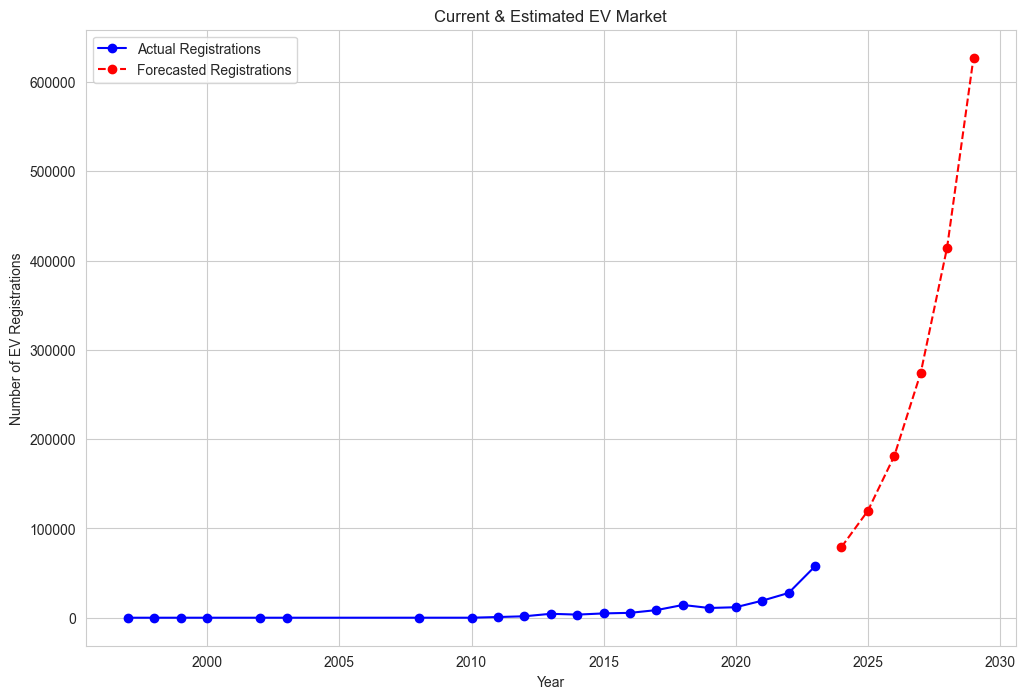

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()

From the above graph, we can see:
1. The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
2. The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

### Model Building and Evaluation

### 1. Predicting Continuous Values (e.g., Base MSRP, Electric Range) 
### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
ev['EV_Type_Binary'] = ev['Electric Vehicle Type'].map({
    'Battery Electric Vehicle (BEV)': 1,
    'Plug-in Hybrid Electric Vehicle (PHEV)': 0
})

In [54]:
# Feature selection for regression (predicting Base MSRP)
features = ev[['Model Year', 'Electric Range','EV_Type_Binary']]  # Example features
target = ev['Base MSRP']  # Target variable (Market Price)

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [56]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [58]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [59]:
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.05553221555063781
Mean Squared Error: 63841466.96496086


In [60]:
# Model coefficients and intercept
coefficients = dict(zip(features.columns, model.coef_))
intercept = model.intercept_

In [61]:
print("Model Coefficients:", coefficients)
print("Intercept:", intercept)

Model Coefficients: {'Model Year': np.float64(-679.795284433528), 'Electric Range': np.float64(-0.5716861936125432), 'EV_Type_Binary': np.float64(211.42476854714394)}
Intercept: 1374425.5582136838


### Random Forest Regressor

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
features = ev[['Model Year', 'Electric Range']]  
target = ev['Base MSRP']

In [64]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [65]:
# Create and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
# Predictions
y_pred = rf_model.predict(X_test)

In [67]:
# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [68]:
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.926616355545017
Mean Squared Error: 4960380.4284045575


### 2. Forecasting Future Values (e.g., EV Adoption Over Time)
### Time Series Forecasting for Market Size Prediction - ARIMA

In [69]:
from statsmodels.tsa.arima.model import ARIMA

In [70]:
yearly_data = ev.groupby('Model Year').size().reset_index(name='Market Size')

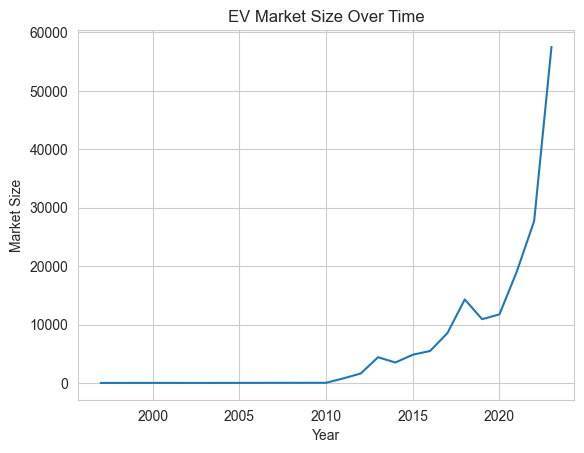

In [71]:
# Plot the time series data
plt.plot(yearly_data['Model Year'], yearly_data['Market Size'])
plt.title('EV Market Size Over Time')
plt.xlabel('Year')
plt.ylabel('Market Size')
plt.show()

In [72]:
# Fit an ARIMA model for time series forecasting
# Here, we'll fit ARIMA with order (p, d, q) as an example.
# You may need to tune the (p, d, q) parameters based on the dataset.

model_arima = ARIMA(yearly_data['Market Size'], order=(1, 1, 1))  # Example order
model_arima_fit = model_arima.fit()

C:\Users\singh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [73]:
# Forecast next 5 years
forecast = model_arima_fit.forecast(steps=5)
print("Forecasted Market Size for next 5 years:\n", forecast)

Forecasted Market Size for next 5 years:
 21     86733.964000
22    115948.927907
23    145163.891720
24    174378.855440
25    203593.819067
Name: predicted_mean, dtype: float64


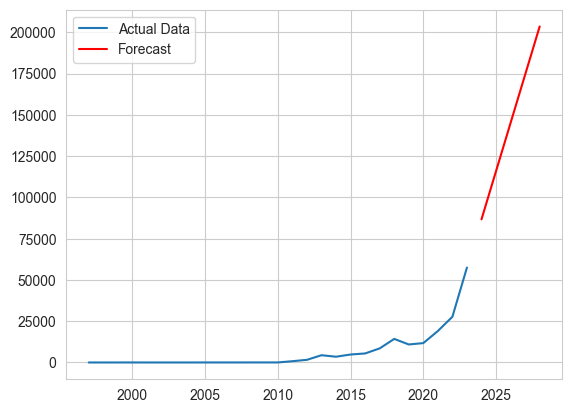

In [74]:
# Plot the forecast
plt.plot(yearly_data['Model Year'], yearly_data['Market Size'], label='Actual Data')
plt.plot(range(yearly_data['Model Year'].max()+1, yearly_data['Model Year'].max()+6), forecast, label='Forecast', color='red')
plt.legend()
plt.show()